
<h1><left>clustering_by_silhouette - implementation</left></h1>

<h4><left>created by Etzion Harari - etzionhar@gmail.com</left></h4>




<h2><left>Introduction</left></h2>

<h4><left>import & define essential modules + variables</left></h4> 

In [10]:
from clustering_by_silhouette import silhouette_clustering

import pandas as pd
from create_3d_gif import pd_to_gif
from sklearn.decomposition import PCA

MPL_Colors=['blue', 'green','red', 'gold', 'purple', 'lime', 'tomato', 'navy', 'teal', 'maroon',
            'olive', 'orange', 'sienna', 'indigo','yellow', 'darkgreen', 'darkblue', 'chocolate',
            'black']

def pca(df,dim):
    return PCA(n_components=dim).fit(df.T).components_

<h4><left>import data</left></h2> 

In [11]:
df1 = pd.read_excel('data_1.xlsx')
df2 = pd.read_excel('data_2.xlsx')
fields1 = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n']
fields2 = ['f' + str(i) for i in range(1, 15)] # fields names


<h2><left>Analysis</left></h2>

<h4><left>run silhouette_clustering for hdbscan & kmeans</left></h4> 

In [19]:
m_label = silhouette_clustering(df1[fields1], typ='meanshift', org=9, lim=13) # MeanShift
h_label = silhouette_clustering(df2[fields2], typ='hdbscan')                  # HDBSCAN
k_label = silhouette_clustering(df2[fields2], org=3 ,lim=10)                  # Kmeans (default)

cluster kind: meanshift,   input value = 9,   silhouette = 31.2%
cluster kind: meanshift,   input value = 10,   silhouette = 37.7%
cluster kind: meanshift,   input value = 11,   silhouette = 28.0%
cluster kind: meanshift,   input value = 12,   silhouette = 33.9%
cluster kind: meanshift,   input value = 13,   silhouette = 46.2%
cluster kind: hdbscan,   input value = 2,   silhouette = 8.3%
cluster kind: hdbscan,   input value = 3,   silhouette = -34.6%
cluster kind: hdbscan,   input value = 4,   silhouette = 18.0%
cluster kind: hdbscan,   input value = 5,   silhouette = -14.2%
cluster kind: hdbscan,   input value = 6,   silhouette = 4.5%
cluster kind: hdbscan,   input value = 7,   silhouette = 5.7%
cluster kind: hdbscan,   input value = 8,   silhouette = 4.7%
cluster kind: hdbscan,   input value = 9,   silhouette = 8.1%
cluster kind: hdbscan,   input value = 10,   silhouette = 35.4%
cluster kind: hdbscan,   input value = 11,   silhouette = 36.6%
cluster kind: hdbscan,   input value = 12,

In [20]:
print(f'meanshift number of clusters: {len(set(m_label))}\nkmeans    number of clusters: {len(set(k_label))}\nhdbscan   number of clusters: {len(set(h_label))-1}')

meanshift number of clusters: 5
kmeans    number of clusters: 5
hdbscan   number of clusters: 4



<h2><left>Plot Results</left></h2>

<h4><left>Arrange Data</left></h4> 

In [21]:
df1['x'], df1['y'], df1['z'] = pca(df1[fields1],3)
df2['x'], df2['y'], df2['z'] = pca(df2[fields2],3)

df1['m_color'] = [MPL_Colors[i] for i in m_label]
df2['h_color'] = [MPL_Colors[i] for i in h_label]
df2['k_color'] = [MPL_Colors[i] for i in k_label]


<h4><left>Plot Data</left></h4>


img number  1  from  36  created
img number  2  from  36  created
img number  3  from  36  created
img number  4  from  36  created
img number  5  from  36  created
img number  6  from  36  created
img number  7  from  36  created
img number  8  from  36  created
img number  9  from  36  created
img number  10  from  36  created
img number  11  from  36  created
img number  12  from  36  created
img number  13  from  36  created
img number  14  from  36  created
img number  15  from  36  created
img number  16  from  36  created
img number  17  from  36  created
img number  18  from  36  created
img number  19  from  36  created
img number  20  from  36  created
img number  21  from  36  created
img number  22  from  36  created
img number  23  from  36  created
img number  24  from  36  created
img number  25  from  36  created
img number  26  from  36  created
img number  27  from  36  created
img number  28  from  36  created
img number  29  from  36  created
img number  30  from  3

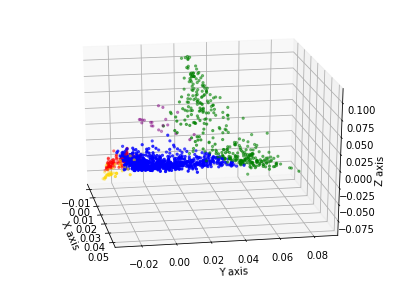

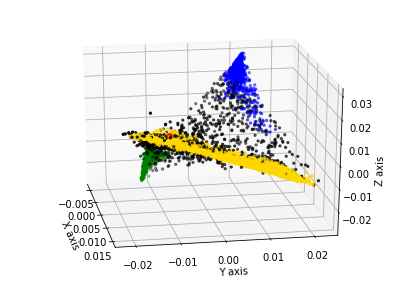

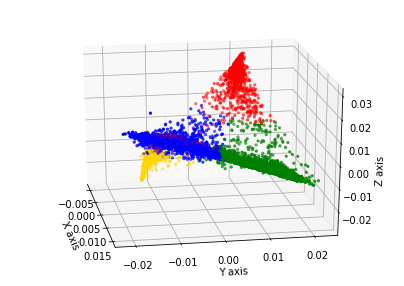

In [23]:
pd_to_gif(df1 ,['x','y','z'] ,'meanshift_plot',clrs='m_color')
pd_to_gif(df2 ,['x','y','z'] ,'hdbscan_plot',clrs='h_color')
pd_to_gif(df2 ,['x','y','z'] ,'kmeans_plot' ,clrs='k_color')

GIF version for this graphs available in [here](https://github.com/EtzionData/Clustering_by_Silhouette)